# Simple Linear Regression
1. Convert cell type to code - esc, y
2. Convert cell to markdown - esc, m

In [2]:
# Ignore non harmful warnings
from warnings import filterwarnings

filterwarnings("ignore")

### Steps in ML
1. Data ingestion and EDA - Read data and visualize if necessary
2. Perform basic data quality checks -> Having any missing values, having any duplicates
3. Seperate X (Predictor) and Y(target feature)
4. Fit the model - Straingt Line will be fitted for given X and Y features
5. Evaluate Model - Evalutate model metrics RMSE, MAE, MAPE, R2 score , R2 >= 0.8 then it is considered good model
6. Out of Sample prediction - You can estimate target value for any given predictor value

### Step 1 - Data Ingestion (Read the dataset)

In [4]:
import pandas as pd

df = pd.read_csv("50_Startups.csv")

In [5]:
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Visualize the data using pairplot

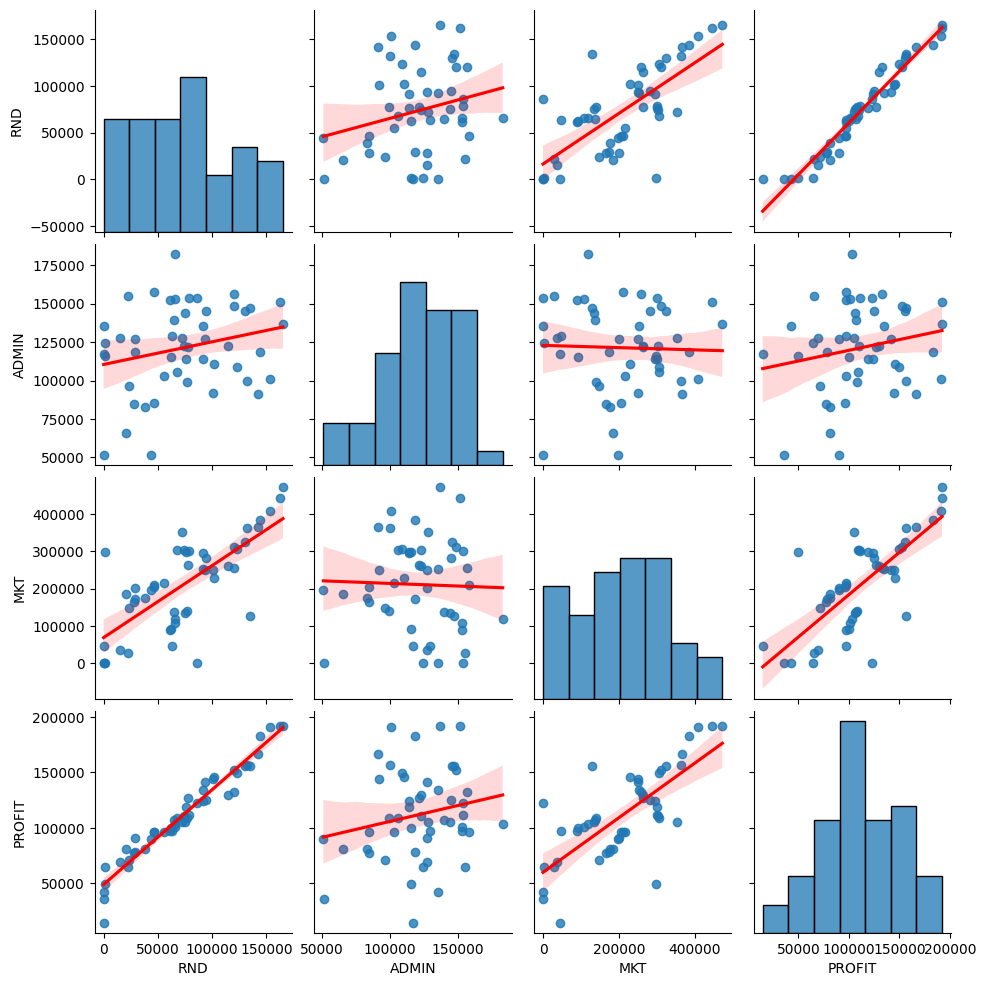

In [8]:
import seaborn as sns

sns.pairplot(df, kind="reg", plot_kws={"line_kws": {"color": "red"}})

<Axes: xlabel='RND', ylabel='PROFIT'>

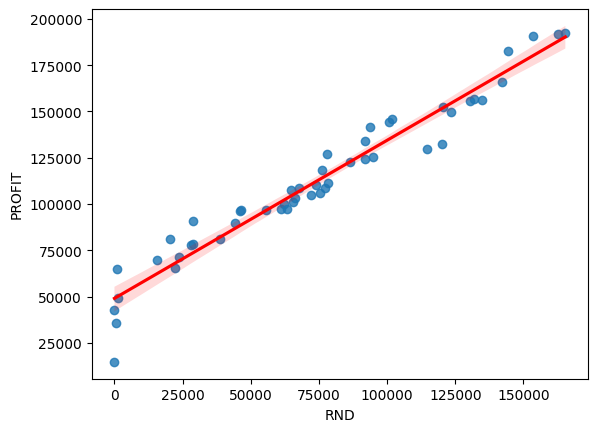

In [10]:
sns.regplot(data=df, x="RND", y="PROFIT", line_kws={"color": "red"})

In [11]:
df.corr(numeric_only=True)

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


## Problem Statement - Predict PROFIT based on RND
1. PROFIT ~ RND : Profit is Dependent on RND
2. PROFIT is Target Feature, RND is Predictor
3. PROFIT_pred = B0 + B1 x RND

### Step 2 - Perform Basic Data quality checks

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [14]:
# Checking Missing values in dataframe
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [18]:
# Check duplicate values
df.duplicated().sum()

np.int64(0)

### This shows that there are no missing values in dataframe and no duplicates
### This data is already clean

### Step 3 - Seperate X(Predictor) and Y(target feature)

In [22]:
# Make sure you use double square bracket for getting dataframe output
X = df[["RND"]]
Y = df[["PROFIT"]]

In [23]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [24]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Step 4 - Create a LinearRegression model

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [27]:
model.intercept_

array([49032.89914125])

In [28]:
model.coef_

array([[0.85429137]])

## PROFIT_pred = 49032.9 + 0.8543 x RND

## IF RND increase by 1 USD the PROFIT will increase by 0.8543 approximately 

## IF RND increase by 1000 USD then PROFIT will increase by 854.3 USD Approximately

# Step 5 - Model evaluation

In [29]:
# R2 score
model.score(X, Y)

0.9465353160804393

In [30]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
)

In [31]:
ypred = model.predict(X)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [32]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [33]:
def evaluate_model(model, x, y):
    # Predict the result on x
    ypred = model.predict(x)

    # Calculate different metrics
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)

    # Print the metrics
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [34]:
evaluate_model(model, X, Y)

RMSE : 9226.10
MAE : 6910.98
MAPE : 11.07%
R2 : 94.65%


### R2 Score >= 0.8 hence above model is a good model

### Hence i can use this model for out of sample prediction

### Step 6 - Out of sample prediction

In [37]:
X.values[0:5]

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34]])

In [43]:
rnd = 1_30_000
profit_pred = model.predict([[rnd]])
print(f"Estimated profit : {profit_pred}")

Estimated profit : [[160090.7773633]]


In [44]:
rnd = 3_00_000
profit_pred = model.predict([[rnd]])
print(f"Estimated profit : {profit_pred}")

Estimated profit : [[305320.31042289]]


In [45]:
rnd = 10_000
profit_pred = model.predict([[rnd]])
print(f"Estimated profit : {profit_pred}")

Estimated profit : [[57575.81285064]]
